In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
csv_file = 'data.csv'
df = pd.read_csv(csv_file)

In [4]:
X = df.drop('target', axis=1).values
y = df['target'].values

<ipython-input-5-7b6df4c32f95>:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == i, 0], X[y == i, 1], marker=marker, color=color, label=f'Class {i}', edgecolor='k')


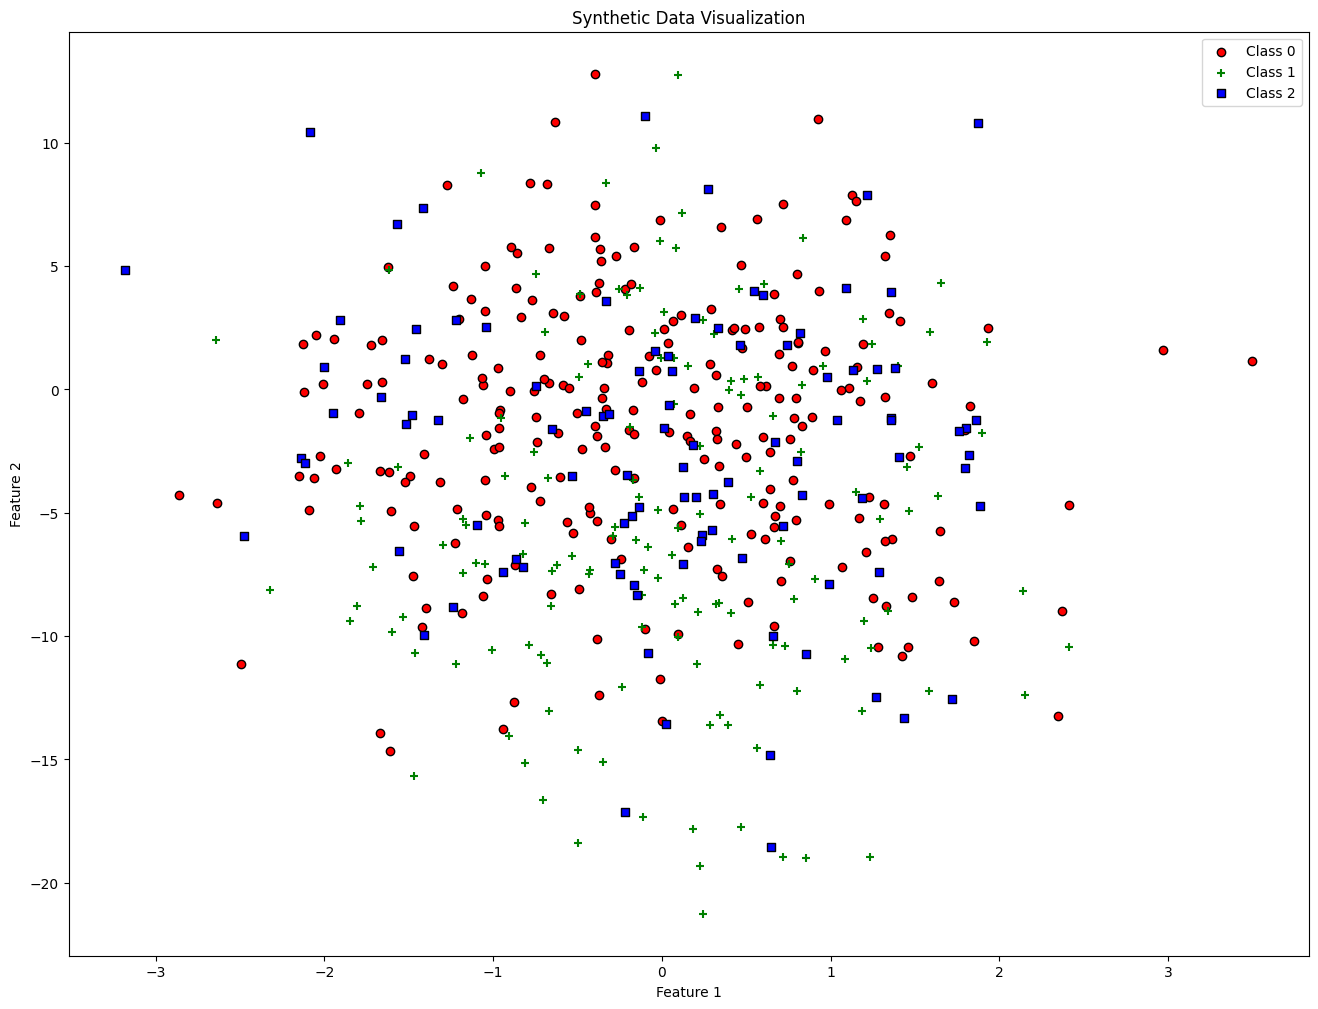

In [5]:
plt.figure(figsize=(16, 12))
colors = ['r', 'g', 'b']
markers = ['o', '+', 's']

for i, marker, color in zip(range(3), markers, colors):
    plt.scatter(X[y == i, 0], X[y == i, 1], marker=marker, color=color, label=f'Class {i}', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data Visualization')
plt.legend()
plt.show()

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
class HumanoidNeuralNet:
    def __init__(self, input_size, hidden_sizes, output_size, lr=0.01):
        self.weights = [np.random.randn(input_size, hidden_sizes[0])]
        for i in range(len(hidden_sizes) - 1):
            self.weights.append(np.random.randn(hidden_sizes[i], hidden_sizes[i + 1]))
        self.weights.append(np.random.randn(hidden_sizes[-1], output_size))
        self.lr = lr

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self, x):
        self.layer_inputs = []
        self.layer_outputs = [x]

        for weight in self.weights:
            input_ = np.dot(self.layer_outputs[-1], weight)
            output = self.sigmoid(input_)
            self.layer_inputs.append(input_)
            self.layer_outputs.append(output)
        return self.layer_outputs[-1]

    def backprop(self, x, y, output):
        errors = [y - output]
        deltas = [errors[-1] * self.sigmoid(self.layer_outputs[-1], derivative=True)]

        for i in range(len(self.weights) - 1, 0, -1):
            error = np.dot(deltas[0], self.weights[i].T)
            delta = error * self.sigmoid(self.layer_outputs[i], derivative=True)
            errors.insert(0, error)
            deltas.insert(0, delta)

        for i in range(len(self.weights)):
            self.weights[i] += np.dot(self.layer_outputs[i].T, deltas[i]) * self.lr

    def train(self, x, y):
        output = self.feed_forward(x)
        self.backprop(x, y, output)

In [10]:
# Train the Neural Network
input_size = X_train.shape[1]
hidden_sizes = [15, 15, 15]
output_size = y_train.shape[1]
lr = 0.01
epochs = 300

In [11]:
nn = HumanoidNeuralNet(input_size, hidden_sizes, output_size, lr)
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

In [12]:
for epoch in range(epochs):
    nn.train(X_train, y_train)
    train_output = nn.feed_forward(X_train)
    val_output = nn.feed_forward(X_val)

    train_loss = np.mean((y_train - train_output) ** 2)
    val_loss = np.mean((y_val - val_output) ** 2)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_output, axis=1))
    val_accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_output, axis=1))
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Train Loss: {train_loss}, Val Loss: {val_loss}, Train Accuracy: {train_accuracy}, Val Accuracy: {val_accuracy}")

Epoch 0, Train Loss: 0.2521563197833473, Val Loss: 0.2543821964725984, Train Accuracy: 0.32285714285714284, Val Accuracy: 0.24
Epoch 10, Train Loss: 0.2106407543068868, Val Loss: 0.21808607585646037, Train Accuracy: 0.4714285714285714, Val Accuracy: 0.48
Epoch 20, Train Loss: 0.20378351901418634, Val Loss: 0.21416503845643697, Train Accuracy: 0.48, Val Accuracy: 0.4666666666666667
Epoch 30, Train Loss: 0.19763393952739394, Val Loss: 0.21065817035808762, Train Accuracy: 0.5171428571428571, Val Accuracy: 0.48
Epoch 40, Train Loss: 0.19052944309892736, Val Loss: 0.20655745633829642, Train Accuracy: 0.5457142857142857, Val Accuracy: 0.48
Epoch 50, Train Loss: 0.1822137664347964, Val Loss: 0.20175886527202783, Train Accuracy: 0.5914285714285714, Val Accuracy: 0.5066666666666667
Epoch 60, Train Loss: 0.1733480906774325, Val Loss: 0.19676496472955585, Train Accuracy: 0.6171428571428571, Val Accuracy: 0.48
Epoch 70, Train Loss: 0.16461655305631961, Val Loss: 0.19170432070079138, Train Accuracy

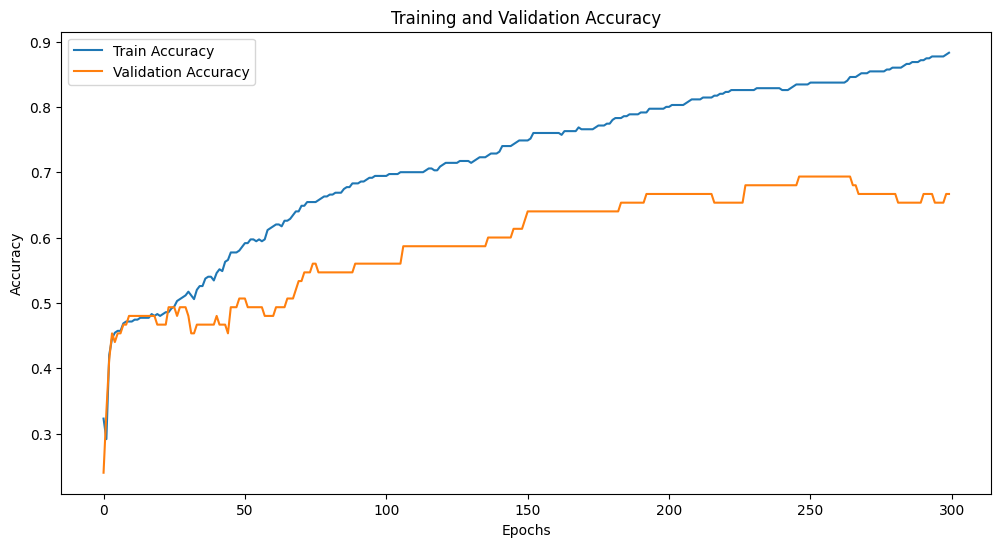

In [13]:
# Plot the accuracy graph
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [14]:
# Evaluate the Model
test_output = nn.feed_forward(X_test)
predicted_classes = np.argmax(test_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

In [15]:
test_predictions = nn.feed_forward(X_test)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_predictions, axis=1))
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.72


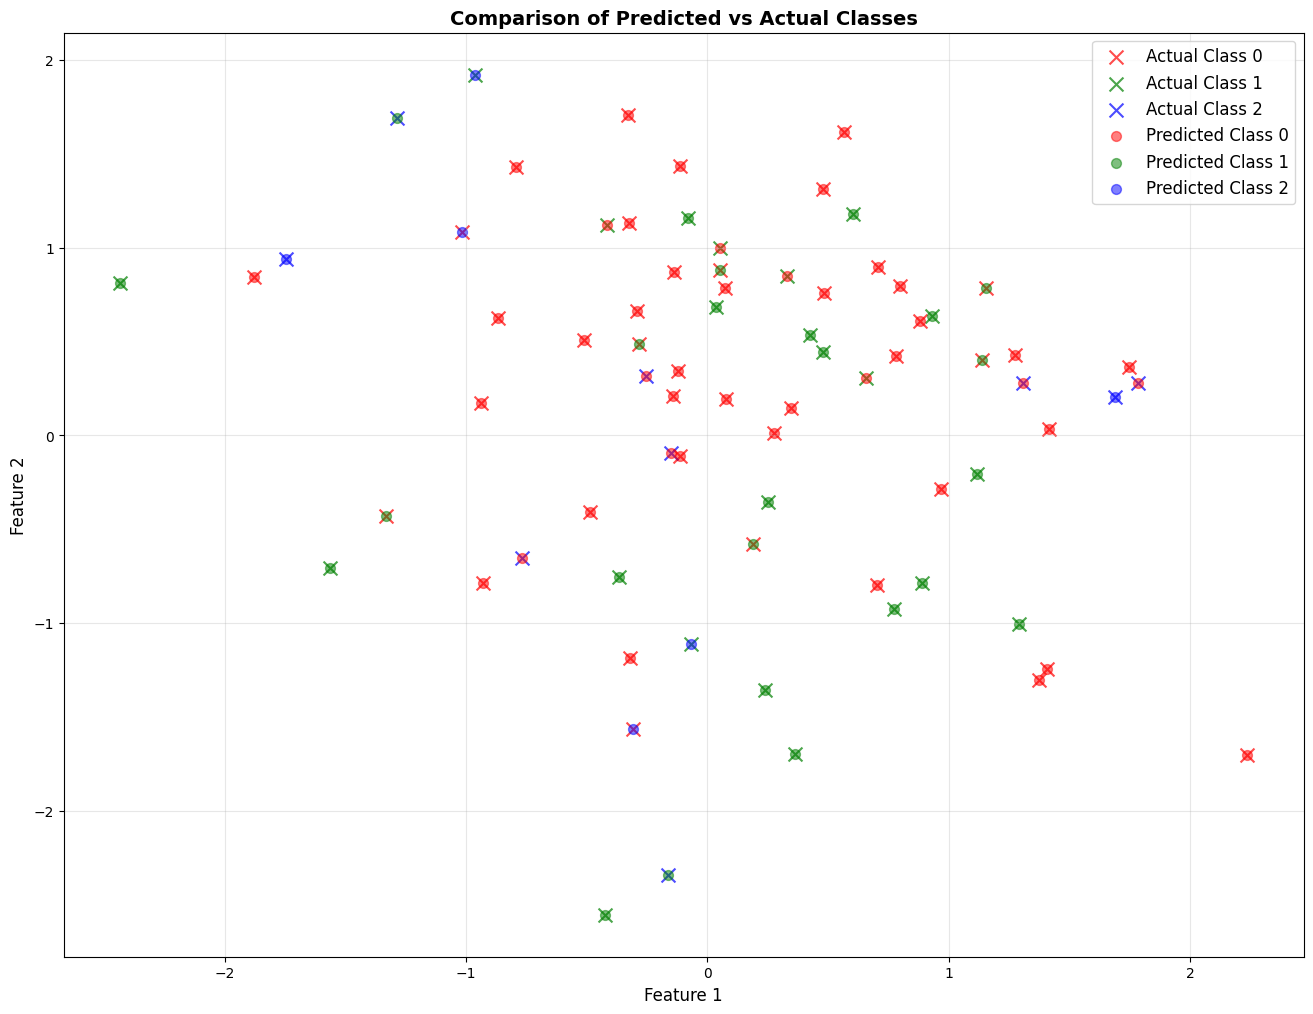

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 12))
colors = ['r', 'g', 'b']

for i, color in enumerate(colors):
    plt.scatter(X_test[actual_classes == i, 0], X_test[actual_classes == i, 1],
                c=[color], marker="x", s=100, alpha=0.7, label=f'Actual Class {i}')

for i, color in enumerate(colors):
    plt.scatter(X_test[predicted_classes == i, 0], X_test[predicted_classes == i, 1],
                c=[color], marker="o", s=50, alpha=0.5, label=f'Predicted Class {i}')

plt.title("Comparison of Predicted vs Actual Classes", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(loc="best", fontsize=12)

plt.grid(alpha=0.3)
plt.show()